In [1]:
from textblob import TextBlob

str1 = 'i love Wits'
str2 = 'i hate Tuks'
str3 = 'i really like food at Wits'
str4 = 'i really do not like food at Tuks'

strs = []
strs.append(str1)
strs.append(str2)
strs.append(str3)
strs.append(str4)
    
wits = ['Wits'] #you can add another parameter here for wits such as 'protests' and it will find both wits and protests
Wits = [s for s in strs if any(xs in s for xs in wits)]

tuks = ['Tuks']
Tuks = [s for s in strs if any(xs in s for xs in tuks)]

def analysis(str):
    analysis = TextBlob(str)
    
    if analysis.sentiment.polarity > 0:
        return 'positive'
    if analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
for s in Tuks:
    a = analysis(s)
    print (a)
    
for b in Wits:
    n = analysis(b)
    print (n)

negative
negative
positive
positive


In [5]:
import csv

csvData = [['Wits', 'Tuks'], ['positive', 'positive'], ['positive', 'negative'], ['negative', 'negative']]

with open('witstuks.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvData)

csvFile.close()

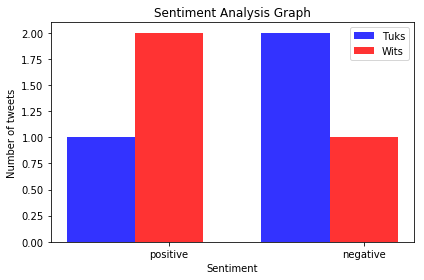

In [9]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

n_groups = 2

with open('witstuks.csv', 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['Tuks']] += 1

    positive = counter['positive']
    negative = counter['negative']
        
tuks_results = [positive,negative]

with open('witstuks.csv', 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['Wits']] += 1
        
    positive1 = counter['positive']
    negative1 = counter['negative']

wits_results = [positive1,negative1]

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, tuks_results, bar_width,
alpha=opacity,
color='b',
label='Tuks')

rects1 = plt.bar(index + bar_width, wits_results, bar_width,
alpha=opacity,
color='r',
label='Wits')

plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.title('Sentiment Analysis Graph')
plt.xticks(index + bar_width, ('positive', 'negative'))
plt.legend()
plt.tight_layout()

plt.show()